# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [4]:
credit_data = pd.read_csv('/content/data_encoded.csv')
credit_data.head(2)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,1,1
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1


In [45]:
x = credit_data.drop(['mau'], axis = 1)
x.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,1
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,1
2,2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,1
3,3,0,46.224658,2.106849,1,1,1,1,2.0,1,1,1
4,4,0,29.230137,3.021918,1,0,0,0,2.0,0,1,0


In [44]:
y = credit_data[['mau']]
y.head()

,mau
0,0
1,0
2,0
3,0
4,0


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [13]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5126006273102076, 0.9791666666666666, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(0.5080512954933182, 0.9375, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Aprovados'),
 Text(0.23782031916406027, 0.8958333333333334, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Aprovados'),
 Text(0.05572931475689508, 0.8541666666666666, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Aprovados'),
 Text(0.038669320443559856, 0.8125, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Aprovados'),
 Text(0.018197327267557576, 0.7708333333333334, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Aprovados'),
 Text(0.013647995450668183, 0.7291666666666666, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Aprovados'),
 Text(0.022746659084446973, 0.7291666666666666, 'idade <= 28.595\ngini = 0.09

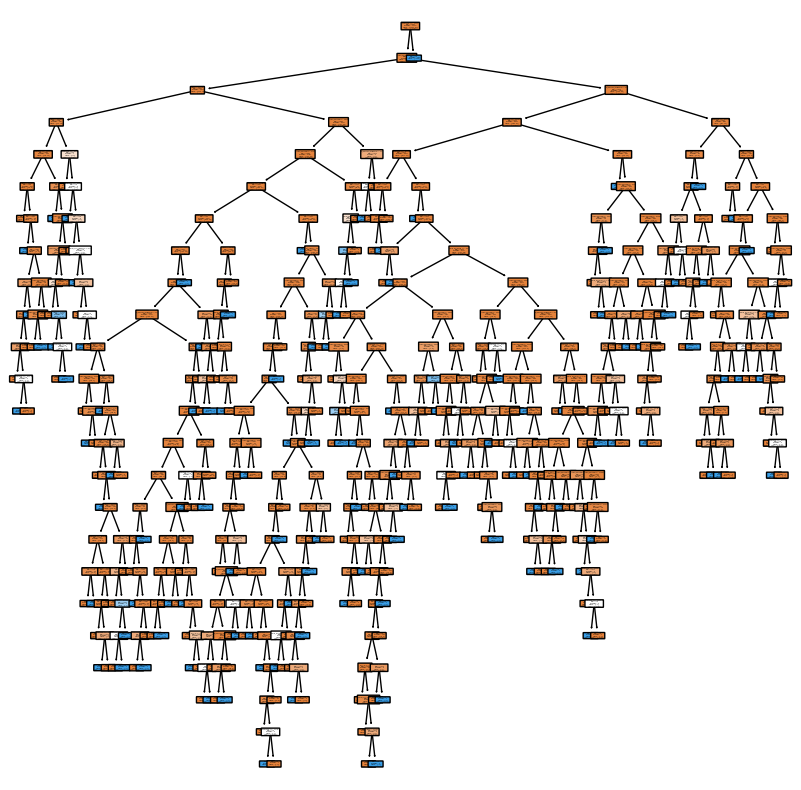

In [17]:
plt.figure(figsize=[10,10])
plot_tree(clf,
          filled = True,
          rounded = True,
          class_names = ['Aprovados','Reprovados'],
          feature_names = x_train.columns)

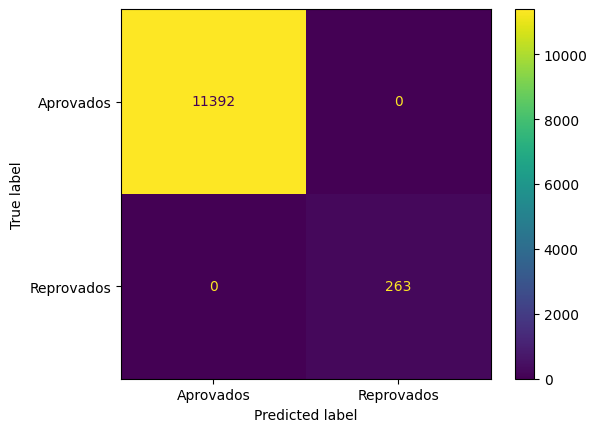

In [28]:
matriz_confusao = ConfusionMatrixDisplay.from_estimator(clf, x_train, y_train, cmap='viridis', display_labels=['Aprovados','Reprovados'])

In [27]:
predict = clf.predict(x_train)
accuracy_score(predict,y_train)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

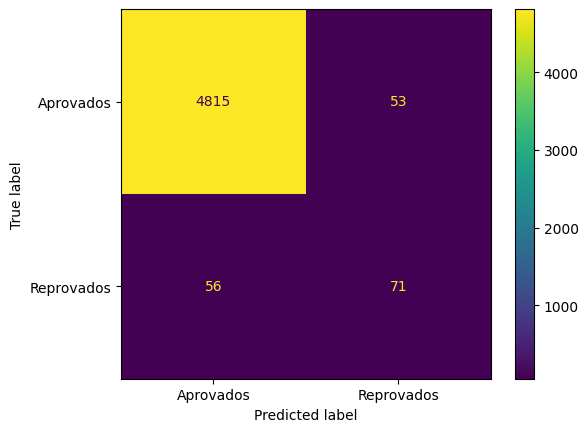

In [29]:
matriz_confusao = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap='viridis', display_labels=['Aprovados','Reprovados'])

In [49]:
predict = clf.predict(x_test)
accuracy_score(predict,y_test)

0.9781781781781782

In [50]:
clf_podada = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 10, random_state = 123)
clf_podada.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

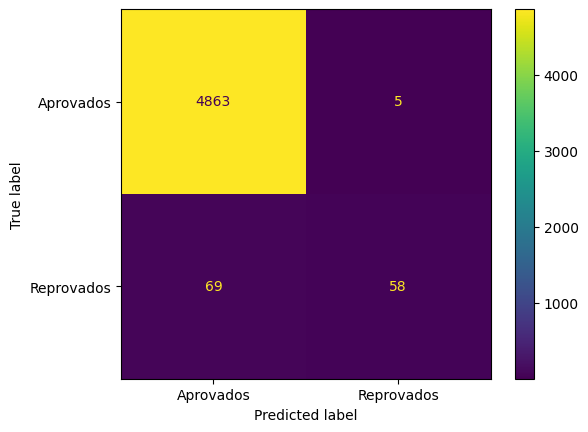

In [51]:
matriz_confusao = ConfusionMatrixDisplay.from_estimator(clf_podada, x_test, y_test, cmap='viridis', display_labels=['Aprovados','Reprovados'])

In [52]:
(69 + 58)/(69+58+4863+5)

0.025425425425425426

Essa é a proporção dos classificados como mau pagadores.

Caso todos sejam classificados como bons pagadores:

In [59]:
predict.shape

(4995,)

In [61]:
predict = np.zeros((4995,))

In [62]:
accuracy_score(y_test,predict)

0.9745745745745745